In [ ]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()


Running on TPU  ['10.10.208.2:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.10.208.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.10.208.2:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
!pip install pandas_read_xml

     |████████████████████████████████| 138 kB 7.7 MB/s 
     |████████████████████████████████| 338 kB 55.5 MB/s 
     |████████████████████████████████| 62 kB 705 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from google.colab import drive

drive.mount('/content/Mydrive') 

Mounted at /content/Mydrive


In [ ]:
import pandas_read_xml as pdx
from tensorflow.keras.applications import EfficientNetB3
import tensorflow as tf
import os
import pandas as pd
import PIL
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
cd /content/Mydrive/MyDrive/horse images

/content/Mydrive/MyDrive/horse images


In [ ]:
data=pd.DataFrame([])
filenames=[]
path='/content/Mydrive/MyDrive/horse images'
for filename in os.listdir(path):
  
  if '.xml' in filename:
   
    test=pdx.read_xml(filename,['annotation','object'])
    if len(str(test).split('horse')) <3:
        print(filename[:-3]+'jpeg') 
        oneline_data=pdx.read_xml(filename,['annotation','object','bndbox'])
        oneline_data=pd.DataFrame(oneline_data)
        data=pd.concat([data,oneline_data])
        filenames.append(filename[:-3]+'jpeg')
    else:
      print(filename[:-3]+'jpeg') 
      for i in range(len(test)-2):
        oneline_data=pdx.read_xml(filename,['annotation','object'])
        oneline_data=pd.DataFrame(dict(test[i][0]['bndbox']))   
        data=pd.concat([data,oneline_data])
        filenames.append(filename[:-3]+'jpeg')

filenames=pd.DataFrame(filenames).reset_index()
data=data.reset_index()                 
data=pd.concat([data,filenames],axis=1)
data.drop('index',axis=1,inplace=True)
data.columns=['xmin','ymin','xmax','ymax','filename']
data['x']=(data['xmax'].astype(int)-data['xmin'].astype(int))/2+data['xmin'].astype(int)
data['y']=(data['ymax'].astype(int)-data['ymin'].astype(int))/2+data['ymin'].astype(int)
data['width']=data['xmax'].astype(int)-data['xmin'].astype(int)
data['height']=data['ymax'].astype(int)-data['ymin'].astype(int)
data.drop(['xmin','ymin','xmax','ymax'],axis=1,inplace=True)


image (1).jpeg
image (2).jpeg
image (3).jpeg
image (4).jpeg
image (5).jpeg
image (6).jpeg
image (7).jpeg
image (8).jpeg
image (9).jpeg
image (10).jpeg
image (11).jpeg
image (12).jpeg
image (13).jpeg
image (14).jpeg
image (15).jpeg
image (16).jpeg
image (17).jpeg
image (18).jpeg
image (19).jpeg
image (20).jpeg
image.jpeg
images (1).jpeg
images (2).jpeg
images (3).jpeg
images (4).jpeg
images (5).jpeg
images (6).jpeg
images (7).jpeg
images (8).jpeg
images (9).jpeg
images (10).jpeg
images (11).jpeg
images (12).jpeg
images (13).jpeg
images (14).jpeg
images (15).jpeg
images (16).jpeg
images (17).jpeg
images (18).jpeg
images.jpeg


In [ ]:
IMGarrays=[]
for i in data['filename']:
  image = PIL.Image.open(i)
  image_array = np.array(image)
  image_array=np.resize(image_array,(300,300,3))
  image_array=tf.convert_to_tensor(image_array)
  IMGarrays.append(image_array)
data['images']=IMGarrays
#data.head()

In [ ]:

inputs =tf.keras.layers.Input(shape=(300, 300, 3))
model = EfficientNetB3(include_top=False, weights='imagenet',input_tensor=inputs,)
model.trainable = False
model = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
model = tf.keras.layers.BatchNormalization()(model)
model = tf.keras.layers.Dense(4)(model)
model = tf.keras.Model(inputs, model, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
        optimizer=optimizer, loss="mse", metrics=["mean_squared_error"])
model.summary()

43950080/43941136 [==============================] - 0s 0us/step
Model: "EfficientNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 300, 300, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 300, 300, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 301, 301, 3)  0           normalization[0][0]              
______________________

In [ ]:
x=np.array([j.numpy() for j in data['images']])
y=data[['x','y','width','height']].to_numpy().astype('float32')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

array([[[[158, 170, 184],
         [158, 170, 184],
         [158, 170, 184],
         ...,
         [158, 170, 184],
         [158, 170, 184],
         [158, 170, 184]],

        [[158, 170, 184],
         [158, 170, 184],
         [158, 170, 184],
         ...,
         [158, 170, 184],
         [160, 172, 186],
         [160, 172, 186]],

        [[160, 172, 186],
         [160, 172, 186],
         [160, 172, 186],
         ...,
         [163, 172, 187],
         [163, 172, 187],
         [163, 172, 187]],

        ...,

        [[124, 140,  16],
         [119, 140,  13],
         [113, 138,   8],
         ...,
         [136,  74,  27],
         [148,  84,  36],
         [147,  81,  33]],

        [[144,  80,  32],
         [134,  70,  22],
         [141,  79,  32],
         ...,
         [102,  55,  27],
         [108,  64,  27],
         [104,  59,  20]],

        [[107,  58,  18],
         [124,  69,  30],
         [144,  85,  45],
         ...,
         [197, 116,  61],
        

In [ ]:
epochs = 61  # @param {type: "slider", min:8, max:80}
hist = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_test,y_test), verbose=1)


Epoch 1/61
1/1 [==============================] - 1s 795ms/step - loss: 186.5132 - mean_squared_error: 186.5132 - val_loss: 671.5233 - val_mean_squared_error: 671.5233
Epoch 2/61
1/1 [==============================] - 1s 552ms/step - loss: 203.8183 - mean_squared_error: 203.8183 - val_loss: 669.1422 - val_mean_squared_error: 669.1422
Epoch 3/61
1/1 [==============================] - 1s 562ms/step - loss: 150.4813 - mean_squared_error: 150.4813 - val_loss: 668.5038 - val_mean_squared_error: 668.5038
Epoch 4/61
1/1 [==============================] - 1s 565ms/step - loss: 133.9476 - mean_squared_error: 133.9476 - val_loss: 669.8836 - val_mean_squared_error: 669.8836
Epoch 5/61
1/1 [==============================] - 1s 559ms/step - loss: 157.9940 - mean_squared_error: 157.9940 - val_loss: 673.0779 - val_mean_squared_error: 673.0779
Epoch 6/61
1/1 [==============================] - 1s 554ms/step - loss: 146.2873 - mean_squared_error: 146.2873 - val_loss: 678.0762 - val_mean_squared_error: 6

In [ ]:
print("end")

end


In [ ]:
image = PIL.Image.open('/content/Mydrive/MyDrive/testhorse.jpg')
image_array = np.array(image)
image_array=np.resize(image_array,(1,300,300,3))
image_array=tf.convert_to_tensor(image_array).numpy()
print(image_array.shape)
results=model.predict(image_array)

(1, 300, 300, 3)


In [ ]:
print(results)
x=results[0][0]
y=results[0][1]
width=results[0][2]
height=results[0][3]
startpoint=(int(x-width/2),int(y-height/2))
endpoint=(int(x+width/2),int(y+height/2))

[[123.11349  93.68    175.76492 161.40204]]


In [ ]:
image = cv2.imread("/content/Mydrive/MyDrive/testhorse.jpg")
image=cv2.rectangle(image, startpoint,endpoint, (255, 0, 0), 2)

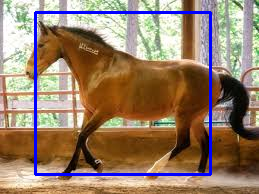

In [ ]:
cv2_imshow( image)